#Step1: Import the right modules

In [13]:
%matplotlib inline
import numpy
import math
import scipy
import random
#import brewer2mpl
import matplotlib.pyplot as plt

In [31]:
class Neural_Net:
    def __init__(self,non,height):
        #list to store the number of neurons in each layer of the network
        self.num_of_neurons = non
        #height of the network
        self.L = height


        #list to store number of weights in each layer of the network, indexed by layer, output neuron, input neuron
        self.weights = numpy.zeros(shape=(10,10,10))


        #delta_matrix: stores the gradient that is used in backpropagation
        self.deltas = numpy.zeros(shape=(10,10))


        #matrix that stores thresholded signals
        self.signals = numpy.zeros(shape=(10,10))


        #(tunable) learning_rate used in backpropagation
        self.learning_rate = .001
        
        
        #initialize weights to be between -2 and 2
        for i in range(1,self.L+1):
            for j in range(1,self.num_of_neurons[i]+1):
                for k in range(self.num_of_neurons[i-1]+1):
                    self.weights[i][j][k] = random.random()*4-2	
    
    def forward_pass(self,x):
        #(for convenience, we index neurons starting at 1 instead of zero)
        self.signals[0][0] = -1
        for i in range(1,self.num_of_neurons[0]+1):
            self.signals[0][i] = x[i-1]
        for i in range(1,self.L+1):
            self.signals[i][0] = -1
            for j in range(1,self.num_of_neurons[i]+1):
                self.signals[i][j] = self.compute_signal(i,j)
        return self.signals[self.L][1]
                    
    def tune_weights(self,y):
        self.deltas[self.L][1] = 2*(self.signals[self.L][1]-y)*(1-math.pow(self.signals[self.L][1],2))
        for i in range(self.L-1,0,-1):
            for j in range(1,self.num_of_neurons[i]+1):
                self.deltas[i][j] = self.compute_delta(i,j)
        for i in range(1,self.L+1):
            for j in range(1,self.num_of_neurons[i]+1):
                for k in range(self.num_of_neurons[i-1]+1):
                    self.weights[i][j][k] = self.weights[i][j][k]-self.learning_rate*self.signals[i-1][k]*self.deltas[i][j]

                    
    def compute_signal(self,level,neuron):
        s = 0
        for i in range(self.num_of_neurons[level-1]+1):
            s += self.weights[level][neuron][i]*self.signals[level-1][i]
        return self.g(s)

    def compute_delta(self,level,neuron):
        s = 0
        for j in range(1,self.num_of_neurons[level+1]+1):
            s += self.weights[level+1][j][neuron]*self.deltas[level+1][j]
        return (1-math.pow(self.signals[level][neuron],2))*s


    def g(self,s):        #soft threshold function
        return (math.exp(s)-math.exp(-s))/(math.exp(s)+math.exp(-s))

# Step3: Forward_pass: Computes the output of the neural network given an input

#Step2: Create a neural nets class as follows. This constructor initializes a new neural network with randomly selected weights and pre-specified height, and number of neurons per layer

#Step 4: Tune_weights performs the backpropagation algorithm given a training example as input

#Step5: Training
Let's train a neural network and see how well it performs on the test and training sets epoch by epoch. We will use a mock training and test set with two covariates. 

Let's instantiate a neural network with one hidden layer with four neurons, and a learning rate of .001. The learning rate is how much we scale the gradient in "walking" the parameter space.


Note that this will take about a minute to run!

In [32]:
#read in the train and test dat, assuming csv format
training = numpy.genfromtxt('train.csv',delimiter = ',')
testing = numpy.genfromtxt('test.csv',delimiter = ',')

#specify the number of neurons in each layer
num_of_neurons = [2,4,1]

#initialize a new neural network
network = Neural_Net(num_of_neurons,2)

#store the training error and test error during each epoch
training_error = 0
test_error = 0

#store the training and test error for all epochs
train = numpy.zeros(shape = (1000))
test = numpy.zeros(shape = (1000))


for epoch in range(1000):
    training_error = 0
    test_error = 0
    #compute the test errors
    for j in range(250):
        test_error = test_error+math.pow(network.forward_pass(testing[j]) - testing[j][2], 2)
    #compute the training errors, SEQUENTIALLY. In other words, we perform backpropagation for *every* example
    #instead of all at once. 
    for i in range(25):
        training_error = training_error+math.pow(network.forward_pass(training[i])- training[i][2], 2)
        network.tune_weights(training[i][2])	   
    training_error = training_error/25
    test_error = test_error/250
    train[epoch] = training_error
    test[epoch]  = test_error
 

Now let's compare the training and test error, epoch by epoch. Do we see signs of overfitting?

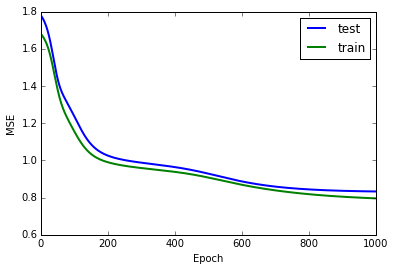

In [33]:
fig, ax = plt.subplots()
ax.plot(numpy.arange(1000), test, lw=2, label = 'test')
ax.plot(numpy.arange(1000), train, lw=2, label = 'train')
ax.legend(loc=0)
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE')